<h1 style="color:#3498db; font-family:'Arial, sans-serif'; text-align:center;">Telecom Churn Case Study Hackathon</h1>
<h2 style="color:#2ecc71; font-family:'Times New Roman', serif; text-align:center;">Predict churning customers for a Telecom company based on temporal behavior.</h2>
<h3 style="color:#e74c3c; font-family:'Verdana, sans-serif'; text-align:center;">Prashant Sundge</h3>


[Kaggle Link](https://www.kaggle.com/competitions/telecom-churn-case-study-hackathon-c55/overview)

# Problem Statement

In the telecom industry, customers have the option to choose from multiple service providers and actively switch from one operator to another. Within this highly competitive market, the telecommunications industry faces an average annual churn rate ranging from 15-25%. Considering the substantial cost, which is 5-10 times higher, associated with acquiring a new customer compared to retaining an existing one, the focus on customer retention has become paramount in the industry.

For many incumbent operators, the primary business objective is to retain highly profitable customers. To address customer churn effectively, telecom companies need to anticipate which customers are at a high risk of churning. The ability to predict and intervene with at-risk customers is crucial for reducing churn rates.

In this project, your task is to analyze customer-level data from a leading telecom firm and develop predictive models to identify customers at a high risk of churn. By leveraging machine learning techniques, your goal is to build a model capable of predicting churning customers based on the provided features related to their usage patterns.

**Competition Goal:**
Build a robust machine learning model that can effectively predict churning customers based on the provided usage-related features.


# Data Definitions

The following definitions provide insights into the various parameters used in the dataset:

- **CIRCLE_ID:** Telecom circle area to which the customer belongs to
- **LOC:** Local calls - within the same telecom circle
- **STD:** STD calls - outside the calling circle
- **IC:** Incoming calls
- **OG:** Outgoing calls
- **T2T:** Operator T to T, i.e., within the same operator (mobile to mobile)
- **T2M:** Operator T to other operator mobile
- **T2O:** Operator T to other operator fixed line
- **T2F:** Operator T to fixed lines of T
- **T2C:** Operator T to its own call center
- **ARPU:** Average revenue per user
- **MOU:** Minutes of usage - voice calls
- **AON:** Age on network - the number of days the customer has been using the operator T network
- **ONNET:** All kinds of calls within the same operator network
- **OFFNET:** All kinds of calls outside the operator T network
- **ROAM:** Indicates that the customer is in a roaming zone during the call
- **SPL:** Special calls
- **ISD:** ISD calls
- **RECH:** Recharge
- **NUM:** Number
- **AMT:** Amount in the local currency
- **MAX:** Maximum
- **DATA:** Mobile internet
- **3G:** 3G network
- **AV:** Average
- **VOL:** Mobile internet usage volume (in MB)
- **2G:** 2G network
- **PCK:** Prepaid service schemes called - PACKS
- **NIGHT:** Scheme to use during specific night hours only
- **MONTHLY:** Service schemes with validity equivalent to a month
- **SACHET:** Service schemes with validity smaller than a month
- **\*.6:** KPI for the month of June
- **\*.7:** KPI for the month of July
- **\*.8:** KPI for the month of August
- **FB_USER:** Service scheme to avail services of Facebook and similar social networking sites
- **VBC:** Volume-based cost - when no specific scheme is purchased, and payment is made as per usage


# Import Library

In [ ]:
!pip install opendatasets -q

In [ ]:
import opendatasets as od
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


from scipy.stats import skew
from datetime import datetime

# Sklearn libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score

# classification model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn import svm


In [ ]:
#this will help us to know if it installed properly or not
od.version()

'0.1.22'

#Load Data From Kaggle

In [ ]:
dataset_url=("https://www.kaggle.com/competitions/telecom-churn-case-study-hackathon-c55/data")

In [ ]:
od.download(dataset_url)

Skipping, found downloaded files in "./telecom-churn-case-study-hackathon-c55" (use force=True to force download)


In [ ]:
data_dir ="telecom-churn-case-study-hackathon-c55"
os.listdir(data_dir)

['data_dictionary.csv',
 'sample.csv',
 'test.csv',
 'train.csv',
 'starter-notebook - Labs 1.ipynb']

In [ ]:
train_csv = data_dir + "/train.csv"
sample_csv = data_dir + "/sample.csv"
test_csv = data_dir + "/test.csv"

# Load Data

In [ ]:
train=pd.read_csv(train_csv)
test=pd.read_csv(test_csv)
sample=pd.read_csv(sample_csv)

# Data Inspection

- Display a few rows of the dataset to get a sense of its structure.
- Check for missing values and handle them appropriately.
- Explore basic statistics of the dataset (mean, median, standard deviation, etc.).

In [ ]:
train.head(3)

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.0,0.0,0.0,0.0,0.0,0.0,2.23,0.00,0.28,5.29,16.04,2.33,0.0,0.0,0.0,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.0,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.0,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.4,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,NaN,145.0,NaN,0.0,3

In [ ]:
train.info(verbose =True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Non-Null Count  Dtype  
---   ------                    --------------  -----  
 0    id                        69999 non-null  int64  
 1    circle_id                 69999 non-null  int64  
 2    loc_og_t2o_mou            69297 non-null  float64
 3    std_og_t2o_mou            69297 non-null  float64
 4    loc_ic_t2o_mou            69297 non-null  float64
 5    last_date_of_month_6      69999 non-null  object 
 6    last_date_of_month_7      69600 non-null  object 
 7    last_date_of_month_8      69266 non-null  object 
 8    arpu_6                    69999 non-null  float64
 9    arpu_7                    69999 non-null  float64
 10   arpu_8                    69999 non-null  float64
 11   onnet_mou_6               67231 non-null  float64
 12   onnet_mou_7               67312 non-null  float64
 13   onnet_mou_8               66296 non-null  fl

In [ ]:
(train.isnull().sum()/len(train)) *100

id                           0.000000
circle_id                    0.000000
loc_og_t2o_mou               1.002871
std_og_t2o_mou               1.002871
loc_ic_t2o_mou               1.002871
last_date_of_month_6         0.000000
last_date_of_month_7         0.570008
last_date_of_month_8         1.047158
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
onnet_mou_6                  3.954342
onnet_mou_7                  3.838626
onnet_mou_8                  5.290076
offnet_mou_6                 3.954342
offnet_mou_7                 3.838626
offnet_mou_8                 5.290076
roam_ic_mou_6                3.954342
roam_ic_mou_7                3.838626
roam_ic_mou_8                5.290076
roam_og_mou_6                3.954342
roam_og_mou_7                3.838626
roam_og_mou_8                5.290076
loc_og_t2t_mou_6             3.954342
loc_og_t2t_mou_7             3.838626
loc_og_t2t_mou_8             5.290076
loc_og_t2m_m

In [ ]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,69999.0,34999.000000,20207.115084,0.000,17499.5000,34999.000,52498.5000,69998.000
circle_id,69999.0,109.000000,0.000000,109.000,109.0000,109.000,109.0000,109.000
loc_og_t2o_mou,69297.0,0.000000,0.000000,0.000,0.0000,0.000,0.0000,0.000
std_og_t2o_mou,69297.0,0.000000,0.000000,0.000,0.0000,0.000,0.0000,0.000
loc_ic_t2o_mou,69297.0,0.000000,0.000000,0.000,0.0000,0.000,0.0000,0.000
arpu_6,69999.0,283.134365,334.213918,-2258.709,93.5810,197.484,370.7910,27731.088
arpu_7,69999.0,278.185912,344.366927,-1289.715,86.7140,191.588,365.3695,35145.834
arpu_8,69999.0,278.858826,351.924315,-945.808,84.0950,192.234,369.9090,33543.624
onnet_mou_6,67231.0,133.153275,299.963093,0.000,7.4100,34.110,119.3900,7376.710
onnet_mou_7,67312.0,133.894438,311.277193,0.000,6.6750,32.280,115.8375,8157.780


- Some Features has no values in mean, min, max, IQR so we will drop that feature

# Data Cleaning

- Clean or impute missing values.
- Remove duplicate records if necessary.
- Correct any data inconsistencies or errors.

In [ ]:
train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

In [ ]:
temp_train=train.copy()

In [ ]:
# data is highly skewed so we will use median for missing fill na values for float and int
train.skew()

id                      0.000000
circle_id               0.000000
loc_og_t2o_mou          0.000000
std_og_t2o_mou          0.000000
loc_ic_t2o_mou          0.000000
arpu_6                 13.700343
arpu_7                 20.271332
arpu_8                 19.045774
onnet_mou_6             6.140530
onnet_mou_7             6.593318
onnet_mou_8             7.149101
offnet_mou_6            4.933533
offnet_mou_7            5.057606
offnet_mou_8            6.184210
roam_ic_mou_6          16.844321
roam_ic_mou_7          27.373082
roam_ic_mou_8          25.776788
roam_og_mou_6          14.083543
roam_og_mou_7          14.273038
roam_og_mou_8          23.746728
loc_og_t2t_mou_6       13.933248
loc_og_t2t_mou_7       15.390718
loc_og_t2t_mou_8       19.932184
loc_og_t2m_mou_6        6.026726
loc_og_t2m_mou_7        5.318859
loc_og_t2m_mou_8        5.474449
loc_og_t2f_mou_6       12.934190
loc_og_t2f_mou_7       13.777206
loc_og_t2f_mou_8       12.678154
loc_og_t2c_mou_6       22.473857
loc_og_t2c

In [ ]:
def data_prepration(train):
  object_col=[]
  # this method will help to find the missing values more than 70 %
  missing_data = (train.isnull().sum() / len(train) * 100) > 70
  # Filter columns based on the boolean mask
  train_filtered = train.loc[:, ~missing_data]
  #this will loop the dataset columns
  for col in train_filtered:
    #this will check if the dtypes is object
    if train_filtered[col].dtype == 'object':
      # if the dtypes are object it will change the datetime dtype
      train_filtered[col] = pd.to_datetime(train_filtered[col] , format='%m/%d/%Y')
      # fill missing values for datetime object
      train_filtered[col] = train_filtered[col].fillna(train_filtered[col].mode()[0])

    else:
      # fill missing values for float and int features with median
      train_filtered[col] = train_filtered[col].fillna(train_filtered[col].median())
  # remove duplicates if any
  train_filtered.drop_duplicates()
  # empty column to add drop features
  drop_col = []
  for col in train_filtered.columns:
    if train_filtered[col].dtypes != 'object':
      if (train_filtered[col].mean() == 0) and (train_filtered[col].min() == 0) and (train_filtered[col].max() == 0):
          drop_col.append(col)
          # this will create date time feature
  train_filtered.drop(columns=drop_col, inplace=True)
  train_filtered['rech_year_6'] = train_filtered['date_of_last_rech_6'].dt.year
  train_filtered['rech_month_6'] = train_filtered['date_of_last_rech_6'].dt.month
  train_filtered['rech_day_6'] = train_filtered['date_of_last_rech_6'].dt.day
  train_filtered['rech_year_7'] = train_filtered['date_of_last_rech_7'].dt.year
  train_filtered['rech_month_7'] = train_filtered['date_of_last_rech_7'].dt.month
  train_filtered['rech_day_7'] = train_filtered['date_of_last_rech_7'].dt.day
  train_filtered['rech_year_8'] = train_filtered['date_of_last_rech_8'].dt.year
  train_filtered['rech_month_8'] = train_filtered['date_of_last_rech_8'].dt.month
  train_filtered['rech_day_8'] = train_filtered['date_of_last_rech_8'].dt.day
    # this will drop single value features like year
  cat_feature=[]
  for col in train_filtered:
    if train_filtered[col].nunique() < 2:
      if col != 'churn_probability':
        # print(date_df[col].value_counts())
        # print("+"*100)
        cat_feature.append(col)

        train_filtered = train_filtered.drop(columns=cat_feature, errors='ignore')
  train_filtered = train_filtered.drop(train_filtered.select_dtypes(include='datetime64[ns]'), axis=1)

  return train_filtered

In [ ]:
# function calling and storing the return dataset on train 1
train_1 = data_prepration(train)

In [ ]:

def display_data(train_1):
  print("Before Clean",train.shape)
  print("After Clean",train_1.shape)
  missing_info=pd.concat([train_1.dtypes, train_1.nunique(), train_1.isnull().sum() / len(train) * 100 ], axis=1)
  missing_info.columns=['Data_Types', 'nunique','Missing_Values']
  print("_"*100)

  print(missing_info)


In [ ]:
display_data(train_1)


Before Clean (69999, 172)
After Clean (69999, 129)
____________________________________________________________________________________________________
                   Data_Types  nunique  Missing_Values
id                      int64    69999             0.0
arpu_6                float64    61615             0.0
arpu_7                float64    61425             0.0
arpu_8                float64    60194             0.0
onnet_mou_6           float64    20057             0.0
onnet_mou_7           float64    20076             0.0
onnet_mou_8           float64    19726             0.0
offnet_mou_6          float64    26254             0.0
offnet_mou_7          float64    26140             0.0
offnet_mou_8          float64    25996             0.0
roam_ic_mou_6         float64     5306             0.0
roam_ic_mou_7         float64     4240             0.0
roam_ic_mou_8         float64     4252             0.0
roam_og_mou_6         float64     6568             0.0
roam_og_mou_7         f

In [ ]:
train_1.head()


,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,rech_day_6,rech_day_7,rech_day_8
0,0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,65,65,0,0.0,0.00,0.00,0.0,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1958,0.0,0.0,0.0,0,22,10,24
1,1,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,0,0,0,0.0,352.91,0.00,0.0,3.96,0.0,0,0,0,0,0,0,0,1,0,0,0,0,710,0.0,0.0,0.0,0,12,10,26
2,2,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.53,12.98,0.00,24.11,0.00,0.00,0.00,0.00,0.00,2.14,0.00,0.00,24.64,12.98,0.00,0.00,2.94,0.00,28.94,82.05,0.0,0.00,0.0,0.0,28.94,84.99,0.00,0.0,0.0,0.0,2.89,1.38,0.00,0.00,0.0,0.0,56.49,99.36,0.00,4.51,6.16,6.49,89.86,25.18,23.51,0.00,0.00,0.00,94.38,31.34,30.01,11.69,0.00,0.00,18.21,2.48,6.38,0.0,0.0,0.0,29.91,2.48,6.38,124.29,33.83,36.64,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.25,2,4,2,70,120,0,70,70,0,70,50,0,0.0,0.00,0.00,0.0,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,882,0.0,0.0,0.0,0,11,22,24
3,3,156.362,205.260,111.095,7.26,16.01,0.00,68.76,78.48,50.23,0.00,0.0,0.0,0.00,0.0,1.63,6.99,3.94,0.00,37.91,44.89,23.63,0.00,0.00,0.00,0.00,0.00,8.03,44.91,48.84,23.63,0.26,12.06,0.00,15.33,25.93,4.6,0.56,0.0,0.0,16.16,37.99,4.60,0.0,0.0,0.0,14.95,9.13,25.61,0.00,0.0,0.0,76.03,95.98,53.84,24.98,4.84,23.88,53.99,44.23,57.14,7.23,0.81,0.00,86.21,49.89,81.03,0.00,0.00,0.00,8.89,0.28,2.81,0.0,0.0,0.0,8.89,0.28,2.81,95.11,50.18,83.84,0.0,0.0

# NOTES
- Calculated the missing values in percentage
- there are lot of features has missing value greater than 70 % we will drop the features whos missing values are more than 70 %
- 30 features has been removed whos missing values are more than 70 %
- for remaining columns we have missing values in range 1 to 10 so will use seperate the dtypes if
- for numerical columns, you might consider imputing missing values with the mean, median, or a constant value.
- For categorical columns, you can impute missing values with the mode or a new category indicating missing
- before applying missing values imputation will verify the data
- we can see all the objects columns are in dates so will convert them on date format
- will apply mode functions on datetime datatype and median to float and int data types
- to apply mean or median we have to identify the data distribution
- Use the mean when your data is approximately normally distributed and not heavily affected by outliers
- Use the median when your data is skewed or contains outliers.
- loc_og_t2o_mou Local outgoing calls operator to other operator mobile minutes of usage voice calls
all rows shows 0.0 so we can drop this
  - ['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']
- extracted datetime features in seperate columns
- rmoved single unique value data columns


In [ ]:
eda_df=train.copy()

#  Exploratory Data Analysis (EDA)
  - Visualize the data to understand its distribution and patterns.
  - Create histograms, scatter plots, and other visualizations.
  - Identify correlations between variables.


# EDA NOTES

- All ID's are unique so we can say there are 69999 row of unique data present in dataset
- Also we can say the complete data is from 109 circle id


- If you have an imbalance in the distribution of your independent features, it might impact the performance of your machine learning model, particularly if the algorithm is sensitive to class distribution.
- will apply below features to overcome Imbalance Distribution
  - Feature Engineering:
    - Create new features that might better capture the underlying patterns in you
  - Dimensionality Reduction:
    - Consider using dimensionality reduction techniques like Principal Component Analysis (PCA) to reduce the impact of imbalanced features.
  - Resampling Techniques:
    - In extreme cases, you might consider resampling your dataset to balance the number of instances for each feature. This might involve oversampling the minority 	features or undersampling the majority features.


In [ ]:
eda_df.head(3)

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.0,0.0,0.0,0.0,0.0,0.0,2.23,0.00,0.28,5.29,16.04,2.33,0.0,0.0,0.0,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.0,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.0,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.4,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,NaN,145.0,NaN,0.0,3

In [ ]:
eda_df['id'].nunique()

69999

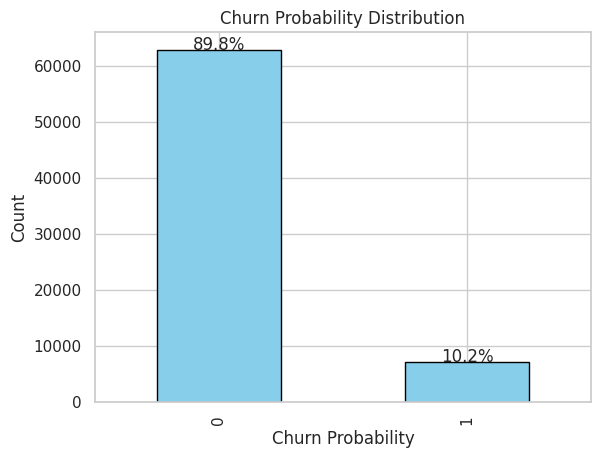

In [ ]:
# Assuming eda_df is your DataFrame
sns.set(style="whitegrid")  # Set a seaborn style for better aesthetics

# Plotting the bar plot
ax = eda_df['churn_probability'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')

# Adding labels and title
ax.set_xlabel('Churn Probability')
ax.set_ylabel('Count')
ax.set_title('Churn Probability Distribution')

# Adding percentage labels on top of each bar
total = len(eda_df['churn_probability'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.01, f'{height/total:.1%}', ha="center")

# Display the plot
plt.show()

# ARPU (Avarage Revenue Per User)

In [ ]:
# # Assuming eda_df is your DataFrame
# plt.figure(figsize=(12, 6))

# # Group by day and calculate the sum of 'arpu_6', then sort values in descending order
# grouped_data = eda_df.groupby(eda_df['date_of_last_rech_6'].dt.day)['arpu_6'].sum().sort_values(ascending=False)

# # Plotting the bar plot
# sns.barplot(x=grouped_data.index, y=grouped_data.values, color='skyblue')

# # Adding labels and title
# plt.title('Total ARPU for each Day in the 6th Month')
# plt.xlabel('Day of the Month (6th Month)')
# plt.ylabel('Total ARPU')

# # Rotating x-axis labels for better visibility
# plt.xticks(rotation=45, ha='right')

# plt.show()

In [ ]:
# # Assuming eda_df is your DataFrame
# plt.figure(figsize=(12, 6))

# # Group by day and calculate the sum of 'arpu_6', then sort values in descending order
# grouped_data = eda_df.groupby(eda_df['date_of_last_rech_7'].dt.day)['arpu_7'].sum().sort_values(ascending=False)

# # Plotting the bar plot
# sns.barplot(x=grouped_data.index, y=grouped_data.values, color='green')

# # Adding labels and title
# plt.title('Total ARPU for each Day in the 7th Month')
# plt.xlabel('Day of the Month (7th Month)')
# plt.ylabel('Total ARPU')

# # Rotating x-axis labels for better visibility
# plt.xticks(rotation=45, ha='right')

# plt.show()

In [ ]:
# # Assuming eda_df is your DataFrame
# plt.figure(figsize=(12, 6))

# # Group by day and calculate the sum of 'arpu_6', then sort values in descending order
# grouped_data = eda_df.groupby(eda_df['date_of_last_rech_8'].dt.day)['arpu_8'].sum().sort_values(ascending=False)

# # Plotting the bar plot
# sns.barplot(x=grouped_data.index, y=grouped_data.values, color='green')

# # Adding labels and title
# plt.title('Total Avg Revenue per user for each Day in the 8th Month')
# plt.xlabel('Day of the Month (8th Month)')
# plt.ylabel('Total ARPU')

# # Rotating x-axis labels for better visibility
# plt.xticks(rotation=45, ha='right')

# plt.show()

In [ ]:
# # Assuming eda_df is your DataFrame
# plt.figure(figsize=(12, 6))

# # Extracting the day component from 'date_of_last_rech_6'
# eda_df['day_of_month_6'] = eda_df['date_of_last_rech_6'].dt.day

# # Plotting the counts of unique values for each day
# sns.countplot(x=eda_df['day_of_month_6'], palette='viridis')

# # Adding labels and title
# plt.title('Number of Recharge Done on each day ')
# plt.xlabel('Day of the Month (6th Month)')
# plt.ylabel('Count')

# # Rotating x-axis labels for better visibility
# plt.xticks(rotation=45, ha='right')

# plt.show()

In [ ]:
# # Assuming eda_df1 is your DataFrame
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x='std_og_t2t_mou_6', y='arpu_6', hue='churn_probability', data=eda_df1, alpha=0.5)
# plt.title('Bivariate Plot: std_og_t2t_mou_6 vs. Churn')
# plt.xlabel('std_og_t2t_mou_6')
# plt.ylabel('Churn')
# plt.show()

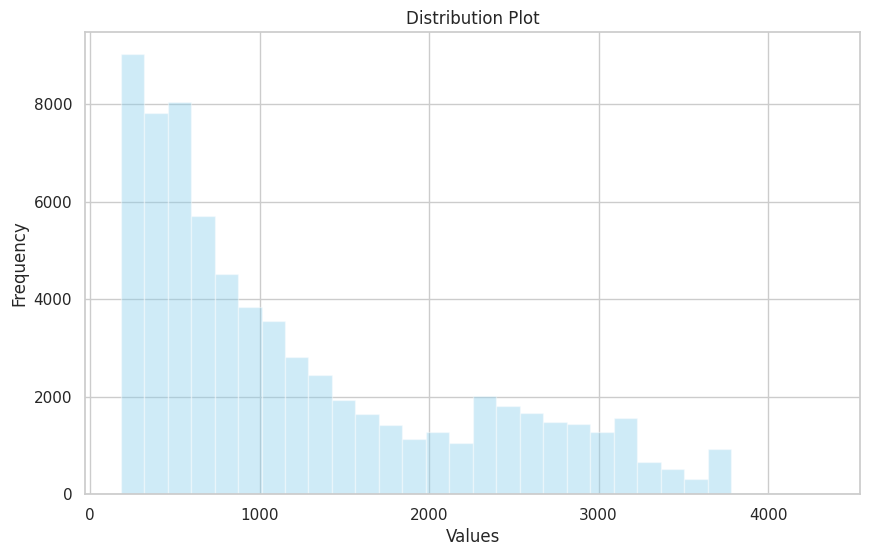

In [ ]:
# Assuming data is your dataset and column_name is the column you want to visualize
sns.set(style="whitegrid")  # Set seaborn style for better aesthetics

plt.figure(figsize=(10, 6))
sns.distplot(eda_df['aon'], kde=False, bins=30, color='skyblue')
plt.title('Distribution Plot')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

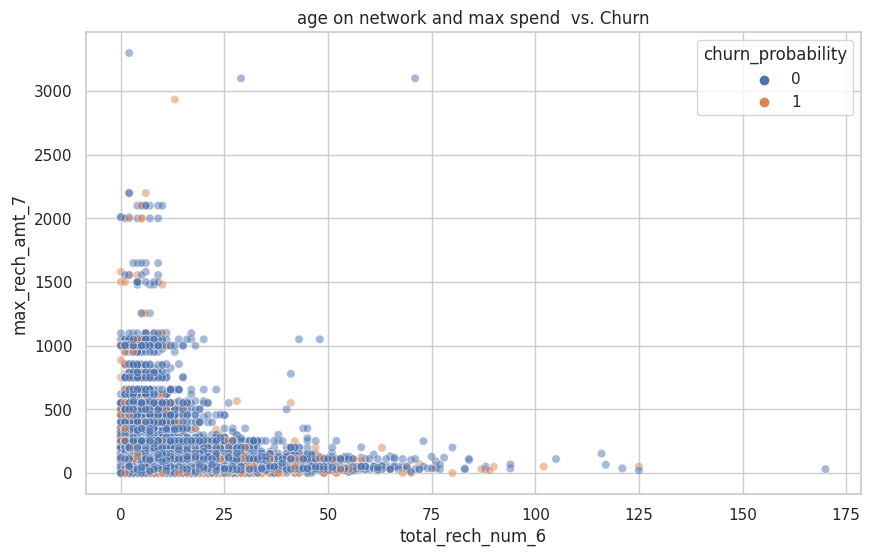

In [ ]:
# Assuming eda_df1 is your DataFrame
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_rech_num_6', y='max_rech_amt_7', hue='churn_probability', data=eda_df, alpha=0.5)
plt.title('age on network and max spend  vs. Churn')
plt.xlabel('total_rech_num_6')
plt.ylabel('max_rech_amt_7')
plt.show()

# Feature Engineering:
   - Create new features that might provide additional information.
   - Encode categorical variables.
    - there is no feature to perform encoding
   - Normalize or scale numerical features.
    - will perform standard scalling

# Standard Scaler

In [ ]:
x=train_1.drop(columns=['churn_probability', 'id'])
y=train_1['churn_probability']

In [ ]:
print(train_1.shape)
print(x.shape)
print(y.shape)


(69999, 129)
(69999, 127)
(69999,)


# Train Test Split

In [ ]:
x_train, x_test, y_train, y_test =train_test_split(x, y, test_size = 0.25, random_state=0)

# Pipeline Construction


In [ ]:
# Standard Scaler
#Logistic Regression
pipe_lr =Pipeline([('scl', StandardScaler()),
                   ('LR', LogisticRegression(random_state=1))])
# descion tree
pipe_dt =Pipeline([('scl', StandardScaler()),
                   ('DT', DecisionTreeClassifier(random_state=1))])
# Random Forest
pipe_rf =Pipeline([('scl', StandardScaler()),
                   ('RF', RandomForestClassifier(random_state=1))])
# K Nearest Neighbour
pipe_knn =Pipeline([('scl', StandardScaler()),
                   ('KNN', KNeighborsClassifier())])
# #STandard Vector machine
# time consuming model so we are not executing it
# pipe_svm =Pipeline([('scl', StandardScaler()),
#                    ('SVM', svm.SVC(random_state=1))])
# XGB
pipe_xgb =Pipeline([('scl', StandardScaler()),
                   ('XGB', XGBClassifier(random_state=1))])


# Grid Search Parameters



In [ ]:
param_range =[1,2,3,4,5,6]
param_range_fl=[1.0,0.5,0.1]
n_estimators=[50,100,150]
learning_rates=[.1,.2,.3]

lr_param_grid = [ {'LR__penalty': ['l1','l2'],
                    'LR__C': param_range_fl,
                    'LR__solver' : ['liblinear']}]

dt_param_grid = [ {'DT__criterion': ['gini','entropy'],
                    'DT__min_samples_leaf': param_range,
                    'DT__max_depth' : param_range,
                    'DT__min_samples_split' : param_range[1:]}]

rf_param_grid = [ { 'RF__min_samples_leaf' : param_range,
                    'RF__max_depth' : param_range,
                    'RF__min_samples_split' : param_range[1:]}]

knn_param_grid =[ { 'KNN__n_neighbors' : param_range,
                    'KNN__weights': ['uniform', 'distance'],
                    'KNN__metric' : ['euclidean', 'manhattan']}]

# svm_param_grid =[ { 'SVM__kernel' : ['linear', 'rbf'],
#                    'SVM__C': param_range}]

xgb_param_grid = [{ 'XGB__learning_rate': learning_rates,
                   'XGB__max_depth': param_range,
                    'XGB__min_child_weight': param_range[:2],
                    'XGB__subsample': param_range_fl,
                    'XGB__n_estimators': n_estimators
                    }]

# GridSearchCV Function to pass both Pipelines

In [ ]:
lr_grid_search = GridSearchCV (estimator=pipe_lr,
                               param_grid=lr_param_grid,
                               scoring='accuracy',
                               cv=3)

dt_grid_search = GridSearchCV (estimator=pipe_dt,
                               param_grid=dt_param_grid,
                               scoring='accuracy',
                               )

rf_grid_search = GridSearchCV (estimator = pipe_rf,
                               param_grid=rf_param_grid,
                               scoring='accuracy',
                               )
knn_grid_search = GridSearchCV (estimator = pipe_knn,
                                param_grid = knn_param_grid,
                                scoring='accuracy',
                                )
# svm_grid_search = GridSearchCV(estimator=pipe_svm,
#                                 param_grid=svm_param_grid,
#                                 scoring='accuracy',
#                                 cv=3)
xgb_grid_search = GridSearchCV(estimator=pipe_xgb,
                                param_grid=xgb_param_grid,
                                scoring='accuracy',
                                )


# Fit Model

In [ ]:
lr_grid_search.fit(x_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scl', StandardScaler()),
                                       ('LR',
                                        LogisticRegression(random_state=1))]),
             param_grid=[{'LR__C': [1.0, 0.5, 0.1], 'LR__penalty': ['l1', 'l2'],
                          'LR__solver': ['liblinear']}],
             scoring='accuracy')

In [ ]:
print("Logistic Regression Train Model")
print(lr_grid_search.score(x_test, y_test)*100)
print("+"*100)
print("Logistic Regression Test Model")
print(lr_grid_search.score(x_train, y_train)*100)
print("+"*100)
print("Logistic Regression Best Params")
print(lr_grid_search.best_params_)


Logistic Regression Model
92.65142857142857
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
93.22844244652279
{'LR__C': 0.5, 'LR__penalty': 'l2', 'LR__solver': 'liblinear'}


In [ ]:
dt_grid_search.fit(x_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('scl', StandardScaler()),
                                       ('DT',
                                        DecisionTreeClassifier(random_state=1))]),
             param_grid=[{'DT__criterion': ['gini', 'entropy'],
                          'DT__max_depth': [1, 2, 3, 4, 5, 6],
                          'DT__min_samples_leaf': [1, 2, 3, 4, 5, 6],
                          'DT__min_samples_split': [2, 3, 4, 5, 6]}],
             scoring='accuracy')

In [ ]:
print("Decision Trees  Train Model")
print(dt_grid_search.score(x_test, y_test)*100)
print("+"*100)
print("Decision Trees  Test Model")
print(dt_grid_search.score(x_train, y_train)*100)
print("+"*100)
print("Best Params")
print(dt_grid_search.best_params_)

Decision Trees Model
93.8457142857143
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
{'DT__criterion': 'gini', 'DT__max_depth': 5, 'DT__min_samples_leaf': 5, 'DT__min_samples_split': 2}
94.34274938570259


In [ ]:
X_test_pred=dt_grid_search.predict(x_test)
dt_confusion_mat=confusion_matrix(y_test, X_test_pred)
test_accuracy=accuracy_score(y_test, X_test_pred)
print(test_accuracy)

0.9384571428571429


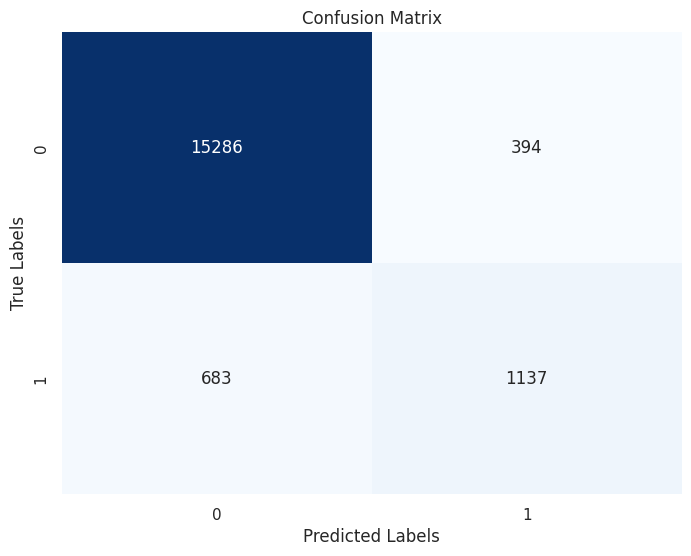

In [ ]:
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(dt_confusion_mat, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
# rf_grid_search.fit(x_train, y_train)

In [ ]:
# knn_grid_search.fit(x_train, y_train)

In [ ]:
# xgb_grid_search.fit(x_train, y_train)

In [ ]:
# print("Logistic Regression Model")
# print(lr_grid_search.score(x_test, y_test)*100)
# print(lr_grid_search.best_params_)
# print("+"*100)
# print("Decision Trees Model")
# print(dt_grid_search.score(x_test, y_test)*100)
# print(dt_grid_search.best_params_)
# print("+"*100)
# print("Random Forest Model")
# print(rf_grid_search.score(x_test, y_test)*100)
# print(rf_grid_search.best_params_)
# print("+"*100)
# print("K Nearest Neighbors Model")
# print(knn_grid_search.score(x_test, y_test)*100)
# print(knn_grid_search.best_params_)
# print("+"*100)
# # print("Support Vector Model")
# # print(svm_grid_search.score(x_test, y_test)*100)
# # print(svm_grid_search.best_params_)
# print("+"*100)
# print("XGBModel")
# print(xgb_grid_search.score(x_test, y_test)*100)
# print(xgb_grid_search.best_params_)



In [ ]:
# grids=[lr_grid_search,
#        dt_grid_search,
#        rf_grid_search,
#        knn_grid_search,
#        xgb_grid_search]

# for pipe in grids:
#   pipe.fit(x_train, y_train)


# Model Performance using Accuracy score

In [ ]:
# grid_dict = { 0 : 'LOGISTIC REGRESSION ',
#               1 : 'DECISION TREES',
#               2 : 'RANDOM FOREST',
#               3 : 'K-NEAREST NEIGHBORS',
#               4 : 'XGBOOST'
#               }

# for i , model in enumerate(grids):
#     print('{} Test Accuracy: {} ' .format(grid_dict[i], model.score(x_test, y_test)))
#     print('{} Best Params :  {}'.format(grid_dict[i], model.best_params_))

# Models output

# TEST DATA

In [ ]:
test_data=data_prepration(test)

In [ ]:
#display_data(test_data)

In [ ]:
sample.shape

(30000, 2)

In [ ]:
test_data.head()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,rech_day_6,rech_day_7,rech_day_8
0,69999,91.882,65.330,64.445,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.00,0.0,0.00,0.03,43.01,44.71,29.43,6.90,0.00,2.05,42.03,7.68,26.43,0.0,0.0,0.0,48.93,7.68,28.48,0.0,0.0,0.0,0.00,0.00,0.03,0.0,0.0,0.0,91.94,52.39,57.94,30.33,37.56,21.98,10.21,4.59,9.53,0.26,0.00,0.00,40.81,42.16,31.51,0.00,0.00,0.00,0.36,1.04,4.34,0.0,0.0,0.00,0.36,1.04,4.34,41.73,43.56,36.26,0.54,0.34,0.39,0.00,0.00,0.00,0.0,0.0,0.00,5,5,4,103,90,60,50,30,30,30,30,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1692,0.00,0.00,0.00,21,26,24
1,70000,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.00,0.0,0.00,0.00,549.86,639.29,397.11,0.00,0.00,0.00,0.00,23.76,17.68,0.0,0.0,0.0,0.00,23.76,17.68,0.0,0.0,0.8,0.00,0.00,0.00,0.0,0.0,0.0,549.86,663.06,415.59,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.00,0.00,181.69,149.24,187.43,0.00,0.00,0.00,0.00,12.51,0.00,0.0,0.0,0.00,0.00,12.51,0.00,296.33,339.64,281.66,0.00,0.00,0.00,114.63,177.88,94.23,0.0,0.0,0.00,5,4,5,500,500,500,250,250,250,250,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,2533,0.00,0.00,0.00,19,16,24
2,70001,329.844,434.884,746.239,7.54,7.86,8.40,16.98,45.81,45.04,22.81,103.38,26.08,24.53,53.68,54.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,6,9,5,500,1000,1000,300,500,500,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,277,525.61,758.41,241.84,29,27,28
3,70002,43.550,171.390,24.400,5.31,2.16,0.00,40.04,205.01,24.01,0.00,0.00,0.00,0.00,0.00,0.00,5.31,0.00,0.00,2.94,98.61,20.51,0.00,0.00,2.35,0.0,6.18,0.00,8.26,98.61,22.86,0.00,2.16,0.00,37.09,94.36,0.00,0.0,0.0,0.0,37.09,96.53,0.00,0.0,0.0,0.0,0.00,12.03,1.15,0.0,0.0,0.0,45.36,207.18,24.01,58.11,54.64,23.04,487.94,449.83,506.94,0.00,0.38,1.64,546.06,504.86,531.64,0.00,4.26,0.

In [ ]:
# lr_grid_search.fit(x_train, y_train)

In [ ]:
test_data['churn_probability'] = lr_grid_search.predict(test_data.drop(['id'], axis =1 ))

In [ ]:
test_data.shape

(30000, 129)

In [ ]:
test_data['churn_probability'].value_counts()

0    28187
1     1813
Name: churn_probability, dtype: int64

In [ ]:
sample['churn_probability'].value_counts()

0    30000
Name: churn_probability, dtype: int64

In [ ]:
sample_submission=test_data[['id','churn_probability']]
sample_submission.to_csv('submission.csv', index=False)

In [ ]:
sample_submission['churn_probability'].value_counts()

0    28187
1     1813
Name: churn_probability, dtype: int64